In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import missingno as msno
from scipy import stats
from scipy.stats import norm,lognorm

### read data into dataframes

In [3]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

### number of samples & number of features

In [4]:
print(f"Initial test data size is: {test_df.shape}")
print(f"Initial train data size is: {train_df.shape}")

Initial test data size is: (1459, 80)
Initial train data size is: (1460, 81)


### drop ID columns since it does not tell anything

In [5]:
if 'Id' in train_df.columns:
    train_df.drop('Id', axis=1, inplace=True)
if 'Id' in test_df.columns:
    test_df.drop('Id', axis=1, inplace=True)
print(f"Dropping ID feature, test data size is: {test_df.shape}")
print(f"Dropping ID feature, train data size is: {train_df.shape}")

Dropping ID feature, test data size is: (1459, 79)
Dropping ID feature, train data size is: (1460, 80)


### checking missing values

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
                   ...   
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
TotalBsmtSF      0.000000
MSSubClass       0.000000
Length: 80, dtype: float64


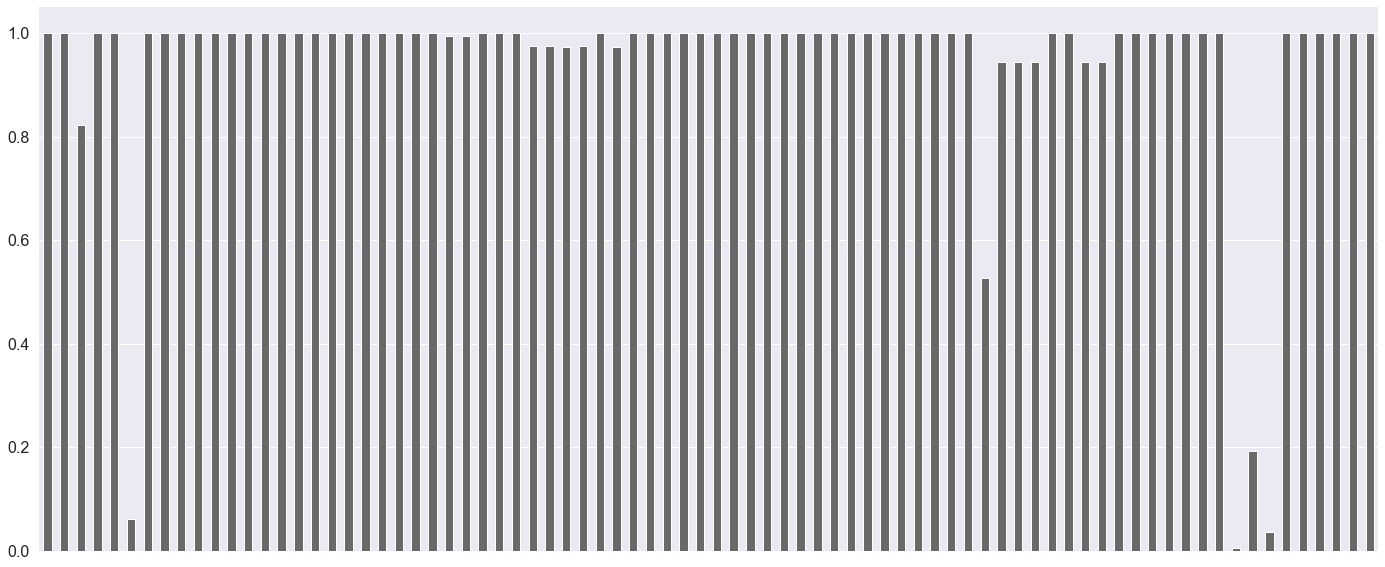

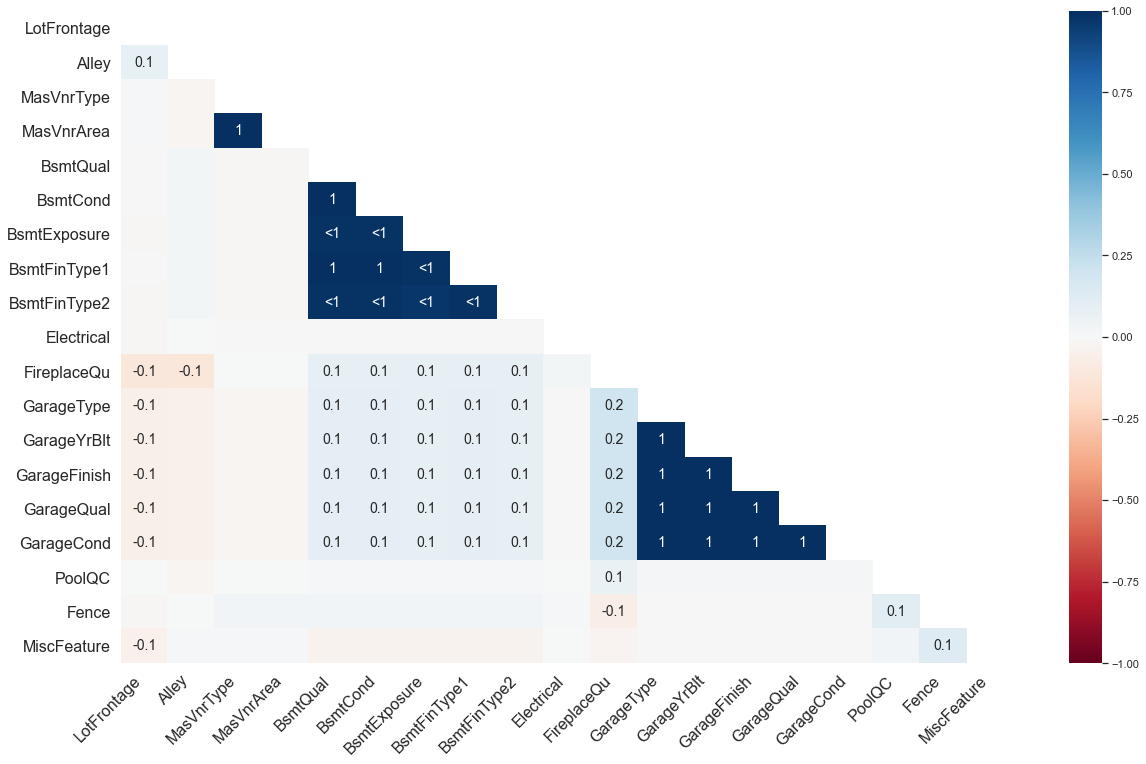

In [6]:
percentmissingvalues=(train_df.isnull().sum() / train_df.shape[0]).sort_values(ascending=False)
print(percentmissingvalues)
msno.bar(train_df)
msno.heatmap(train_df)

### check column types

In [7]:
train_df_column_types=train_df.dtypes.value_counts()
type_dct={str(k):list(v) for k,v in train_df.groupby(train_df.dtypes,axis=1)}
print()
print(f'Count of column data types: \n{train_df_column_types}\n')
print(f'Classification of feature by data type:\n{type_dct}\n')
print()


Count of column data types: 
object     43
int64      34
float64     3
dtype: int64

Classification of feature by data type:
{'int64': ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], 'float64': ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], 'object': ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinT

### list of variables that contain year information

In [8]:
numeric_features=train_df.select_dtypes(include=[np.number])
datetime_features=[x for x in numeric_features if 'Year' in x or 'Yr' in x]
print(f'Year features include:\n{datetime_features}\n')

Year features include:
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']



### univariate visualisation

In [9]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

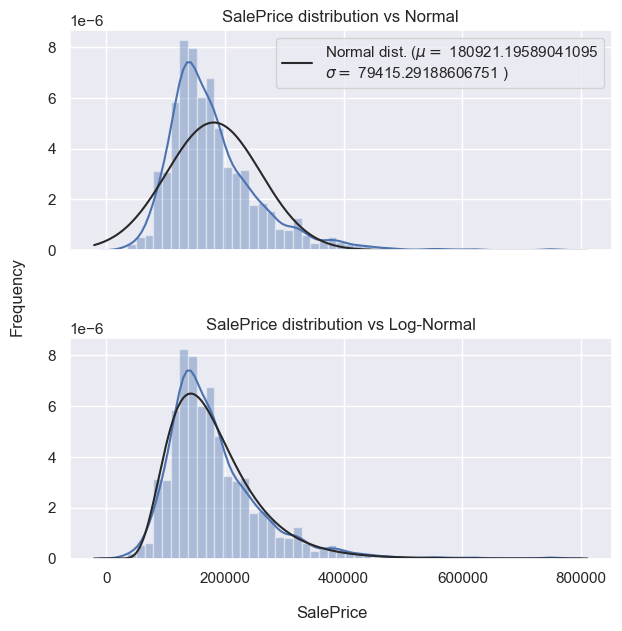

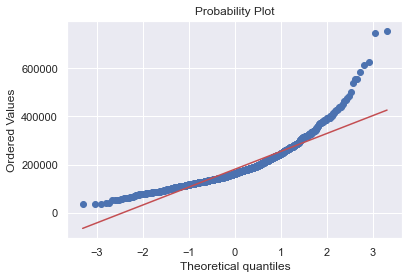

In [71]:
fig, axs = plt.subplots(2,1,sharex=True,sharey=True,figsize=(7,7),dpi=100)
sns.distplot(train_df['SalePrice'],fit=norm,ax=axs[0])
axs[0].set_title('SalePrice distribution vs Normal')
axs[0].set_xlabel('')
(mu, sigma) = norm.fit(train_df['SalePrice'])
axs[0].legend([f'Normal dist. ($\mu=$ {mu}\n$\sigma=$ {sigma} )'])

sns.distplot(train_df['SalePrice'],fit=lognorm,ax=axs[1])
axs[1].set_title('SalePrice distribution vs Log-Normal')
axs[1].set_xlabel('')

fig.text(0.5, 0.04, 'SalePrice', ha='center')
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')
plt.subplots_adjust(hspace=0.4)
plt.show()

#QQ plot
res=stats.probplot(train_df['SalePrice'],plot=plt)
plt.show()

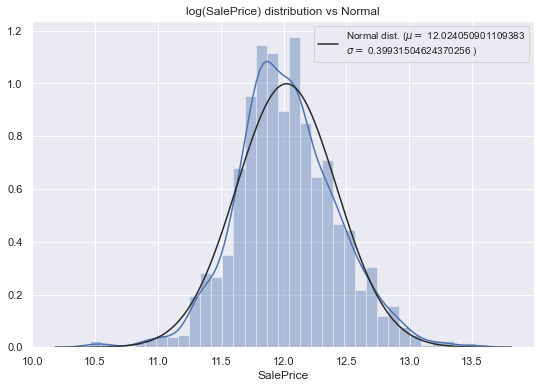

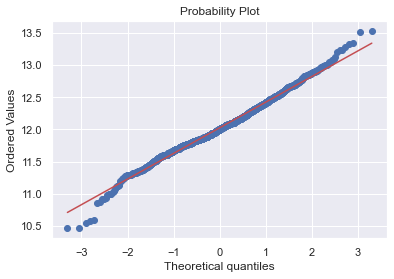

In [82]:
plt.figure(figsize=(9,6))
log_SalePrice=np.log(train_df['SalePrice'])

sns.distplot(log_SalePrice,fit=norm)
plt.title('log(SalePrice) distribution vs Normal')
(mu, sigma) = norm.fit(log_SalePrice)
plt.legend([f'Normal dist. ($\mu=$ {mu}\n$\sigma=$ {sigma} )'],fontsize='small')
plt.show()

#QQ plot
res=stats.probplot(log_SalePrice,plot=plt)
plt.show()

### compare Year features with SalePrice

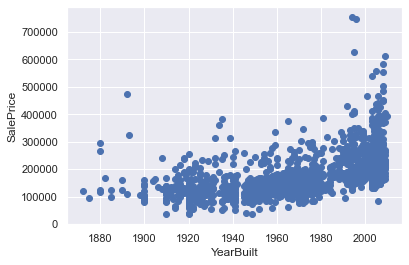

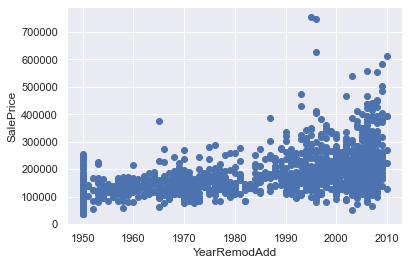

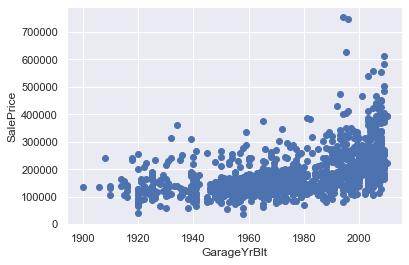

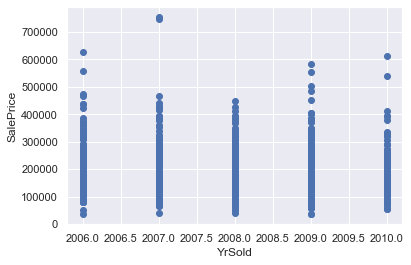

In [11]:
for x in datetime_features:
    train_df_copy=train_df.copy()
    plt.scatter(train_df_copy[x],train_df_copy['SalePrice'])
    plt.xlabel(x)
    plt.ylabel('SalePrice')
    plt.show()

### Correlation matrix heatmap

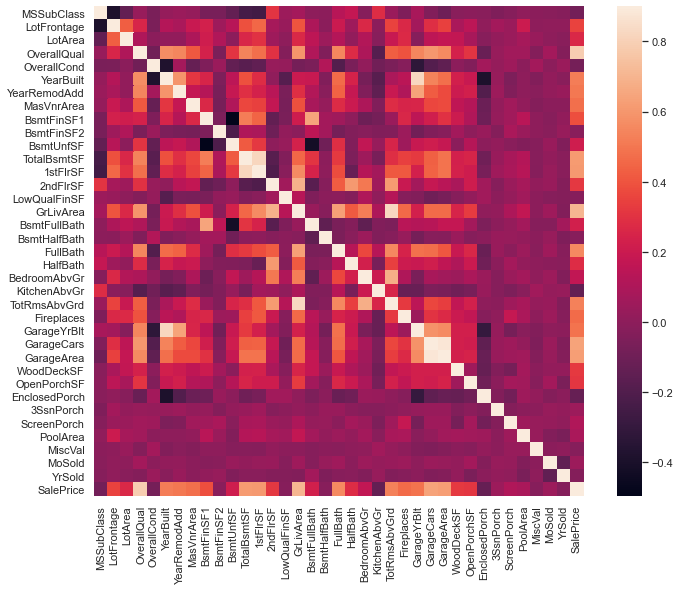

In [96]:
#correlation matrix
correlationmatrix=train_df.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(correlationmatrix, vmax=0.9, square=True);

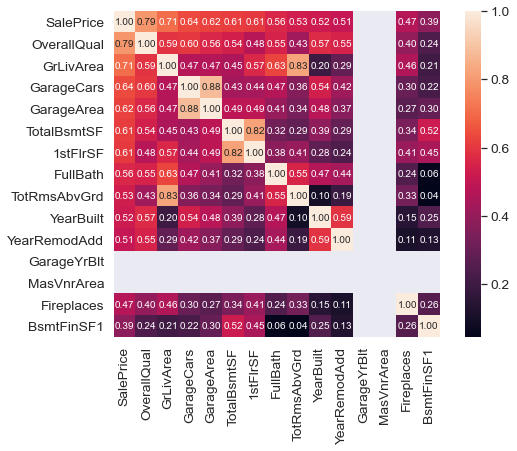

In [107]:
#saleprice correlation matrix

k = 15
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)

plt.figure(figsize=(9,6))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
